<a href="https://colab.research.google.com/github/Linkonb/Mobile_Finance_Fraud_Detection/blob/main/Mobile_Finance_Fraud_Detection_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PS_20174392719_1491204439457_log.csv')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data_df.count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [5]:
data_df=data_df.dropna()
data_df.count()
data_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
data_df['SnameOrig']=data_df['nameOrig'].str[0:1]

In [7]:
data_df['SnameOrig'].head(10)

0    C
1    C
2    C
3    C
4    C
5    C
6    C
7    C
8    C
9    C
Name: SnameOrig, dtype: object

In [8]:
data_df['SnameDest']=data_df['nameDest'].str[0:1]

In [9]:
data_df['SnameDest'].head(10)

0    M
1    M
2    C
3    C
4    M
5    M
6    M
7    M
8    M
9    C
Name: SnameDest, dtype: object

In [10]:
data_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,SnameOrig,SnameDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,C,M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,C,C
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,C,M


In [11]:
# Preform label encoding for gender variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lableencoder_X_2 = LabelEncoder()


In [12]:
data_df['type'] = lableencoder_X_2.fit_transform(data_df['type'])
data_df['nameOrig'] = lableencoder_X_2.fit_transform(data_df['nameOrig'])
data_df['nameDest'] = lableencoder_X_2.fit_transform(data_df['nameDest'])
data_df['SnameOrig'] = lableencoder_X_2.fit_transform(data_df['SnameOrig'])
data_df['SnameDest'] = lableencoder_X_2.fit_transform(data_df['SnameDest'])

In [13]:
data_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,SnameOrig,SnameDest
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,1
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,1
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,1


In [14]:
from sklearn.model_selection import train_test_split
#X=data_df[['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','SnameOrig','SnameDest']]
X=data_df[['step','type','amount','nameOrig','nameDest','SnameOrig','SnameDest']]
Y=data_df[['isFraud']]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [16]:
X_train.count()
X_test.count()

step         1908786
type         1908786
amount       1908786
nameOrig     1908786
nameDest     1908786
SnameOrig    1908786
SnameDest    1908786
dtype: int64

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
           min_samples_leaf=1,
             min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


In [18]:
model = clf.fit(X_train, y_train)

In [19]:
predicted = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9985121433204142


In [20]:
print(predicted)

[0 0 0 ... 0 0 0]


In [24]:
y_test.groupby(['isFraud'])['isFraud'].count()

isFraud
0    1906350
1       2436
Name: isFraud, dtype: int64

In [29]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score, confusion_matrix, roc_auc_score, roc_curve


#calculate AUC of model
auc = metrics.roc_auc_score(y_test, predicted)

#print AUC score
print('AUC: ',auc)


f1=f1_score(y_test, predicted)
#print f1 score
print('f1: ',f1)


acc=accuracy_score(y_test, predicted)
print('acc: ',acc)

precision = precision_score(y_test, predicted)
print('Precision: ',precision)


recall = recall_score(y_test, predicted)
print('Recall: ',recall)

AUC:  0.7106260551816647
f1:  0.4199346405228758
acc:  0.9985121433204142
Precision:  0.41788617886178864
Recall:  0.4220032840722496


[[1904918    1432]
 [   1408    1028]]


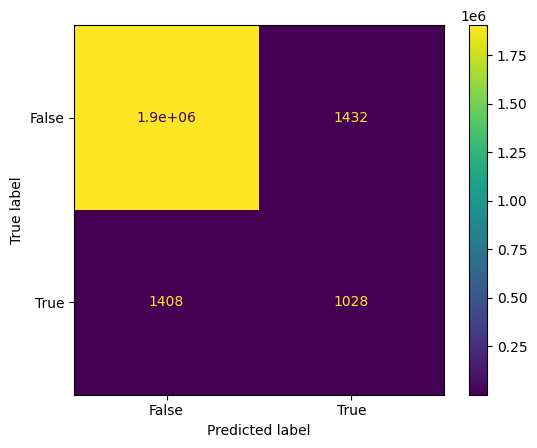

In [21]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()